# 02: Parametrized gates

In this jupyter notebook, the goal is to learn how to apply parametrized gates (rotations with some angle) in Qiskit. 

We once again start by importing everything we need

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

In this hands-on exercise, you need to check the correctness of your solutions by running the circuit. For this purpose, we use noiseless `Aer` simulator backend

In [ ]:
backend_simulator = Aer.get_backend('statevector_simulator')

### Bloch sphere representation

Any pure state of a single qubit can be written in a form $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$, where $\alpha$ and $\beta$ are amplitudes of basis states.


Since the amplitudes must a satisfy relation $|\alpha|^2 + |\beta|^2 = 1$, we can rewrite them as $\alpha=\cos(\frac{\theta}{2})$ and $\beta=e^{i \phi}\sin(\frac{\theta}{2})$. 

General single qubit state reads then $|\psi\rangle = \cos(\frac{\theta}{2})|0\rangle + e^{i \phi}\sin(\frac{\theta}{2})|1\rangle$.

The angle $\theta$ tells 'how much the superposition is $|0\rangle$ and how much $|1\rangle$'. The azimuthal angle $\phi$ tells *the phase difference* of states $|0\rangle$ and $|1\rangle$, an important feature related to the *wave nature* of quantum states.

Rewiring qubit state in terms of angles leads to a useful geometric representation called *Bloch sphere*, which is displayed below. 

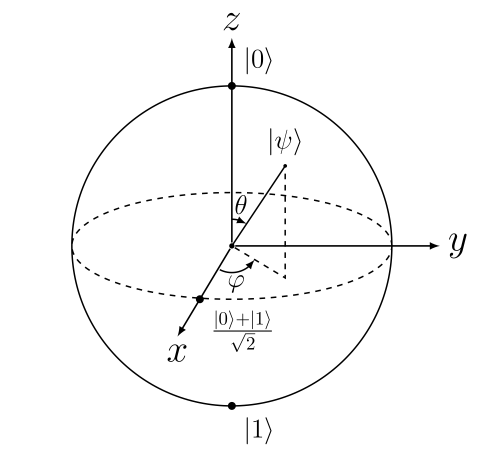


## 1-qubit rotation

### Y-rotation

Keeping the Bloch representation in mind, all single-qubit gates can be represented as a rotation on the Bloch sphere. Let's practice making a parametrized rotation to reach a specific state. The first step will be to create a simple circuit with:
+ a single qubit
+ a single gate

Your goal is to create a superposition of:
+ 30% to get the state $|0\rangle$
+ 70% to get the state $|1\rangle$

You need to know that:
+ the initial state is $|\psi_0\rangle = |0\rangle =\begin{pmatrix} 1  \\  0 \end{pmatrix}$
+ a general state can be represented as $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle =\begin{pmatrix} \alpha  \\  \beta \end{pmatrix}$ (This is the **statevector representation**, where qubit states are column vectors)
+ Relationship between probability amplitude of a state and probability of measuring that state, $p(0) = |\alpha|^2$ and $p(1) = |\beta|^2$. This is known as the **Born's rule**.

We will use a single rotation along the y-axis to obtain a 30% probability for $|0\rangle$ and 70% for $|1\rangle$:
+ $R_y(\theta) = e^{-i\theta Y/2}= \cos \frac{\theta}{2}I - i \sin \frac{\theta}{2} Y = \cos \frac{\theta}{2}\begin{pmatrix}
    1 & 0 \\
    0 & 1 
\end{pmatrix} - i \sin \frac{\theta}{2} \begin{pmatrix}
    0 & -i \\
    i & 0 
\end{pmatrix}=
\begin{pmatrix}
    \cos \frac{\theta}{2} & -\sin\frac{\theta}{2} \\
    \sin\frac{\theta}{2} & \cos\frac{\theta}{2} 
\end{pmatrix},$  $\hspace{1cm}$ 
where Y is the Pauli matrix $ Y=\begin{pmatrix}
    0 & -i \\
    i & 0 
\end{pmatrix}$ 

+ **Explanation for above equation**: General rotations can be expressed as matrix exponentials $e^{B}$ of another (skew symmetric) matrix **B** called the *generator*. The matrix that generates a rotation around the y-axis in the Bloch representation is the Pauli Y-matrix. Hence, operating on a qubit statevector with the matrix  $e^{-i\theta Y/2}$ corresponds to rotating the qubit $\theta$ radians on the Bloch sphere. The factor 1/2 ensures faithful mapping between the angles in vector representation and Bloch sphere representation; in the former orthogonal vectors are $\pi/2$ radians (90 degrees) apart, as usual, but in the latter, they are $\pi$ radians (180 degrees) apart.
$\\$
The second equality follows from Taylor expanding the matrix exponential, simplifying using the $\sigma^2=I$ relation of Pauli matrices and regrouping the series expansion into a sum of cosine and sine terms. From this one gets the explicit matrix of the rotation operation.

Complete the following cell by:
+ Putting the right angle (in radians) for the rotation (**Hint:** solve $\theta$ from $|\cos(\theta/2)|^2=0.3$. This is the Born's rule when $\alpha=\cos(\theta/2)$ and $P_0=0.3 $)

In [ ]:
# Fill your answer here------
angle_Y = 'XXX'
#----------------------------

# Creating circuit
qc_Y = QuantumCircuit(1,1)

# Adding Y-rotation gate, inpt parameters are: 1) angle of rotation, 2) target qubit
qc_Y.ry(angle_Y, 0)

# Adding measurement
qc_Y.measure(0,0)

# Visualizing
qc_Y.draw('mpl', style="clifford")

Execute the following to print the full distribution of the circuit and see if you obtain the correct result:

Complete the following cell by:
+ Fill in the appropiate number of shots

In [ ]:
# Fill your answer here------
shots_Y = 'XXX'
#----------------------------

result = backend_simulator.run(qc_Y, shots=shots_Y).result()

counts = result.get_counts()
experiment = result._get_experiment()

for sample in counts:
    print(f"Measurement: {sample}, Hits: {counts[sample]}, Probability: {counts[sample]/experiment.shots}")

As a reminder, you should have superposition with probabilities:
+ 30% to get the state $|0\rangle$
+ 70% to get the state $|1\rangle$

### X-rotation

Next, we perform a rotation around the x-axis:
+ $R_x(\theta) = e^{-i\theta X/2}= \cos \frac{\theta}{2}I - i \sin \frac{\theta}{2} X = 
\begin{pmatrix}
    \cos \frac{\theta}{2} & -i\sin\frac{\theta}{2} \\
    -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2} 
\end{pmatrix},$ $\hspace{1cm}$ 
where X is the Pauli matrix $ X=\begin{pmatrix}
    0 & 1 \\
    1 & 0 
\end{pmatrix}$ 

See what happens if you change the y-axis of the rotation to the x-axis. Complete the following cell:

In [ ]:

# 1. TODO: Create a quantum circuit where you perform rotation around X-axis for one qubit
# qc_X = 
    
# 2. TODO: Add measurement and run the circuit

# 3. TODO: Add measurement and run the circuit

# 4. TODO: Print the measured states and their probabilities


    
# qc_X.draw('mpl', style="clifford")

You should notice that the probabilities are the same as in the case of Y-rotation, if you put the same angle

**Explanation:**
It does not matter that the end state is in a different azimuthal location in the Bloch sphere (the $\phi$ angle is different) since the phase information cancels out when probabilities are obtained from amplitudes. This cancellation follows from the behavior of complex numbers:
Consider the probability of measuring a state with amplitude $\alpha=r_\alpha e^{i\theta_\alpha}$, where $r_\alpha$ and $\theta_\alpha$ are the modulus and phase of the complex number $\alpha$.

The probability is given by Born's rule: $P_\alpha=|\alpha|^2=\alpha \alpha^*$, where $^*$ denotes a *complex conjugation* (flipping of the sign of the imaginary unit $i \rightarrow -i$).

Hence, $P_\alpha=\alpha \alpha^*=r_\alpha e^{i\theta_\alpha}r_\alpha e^{-i\theta_\alpha}=r_\alpha^2 e^{(i\theta_\alpha-i\theta_\alpha)}=r_\alpha^2$. So we see that the phase of a state does not affect the probability of measuring the state.

### 2-qubit rotation with entanglement

Let's continue with two qubits. The state of more than one qubit cannot be visualized on a Bloch sphere (higher dimension hyperspheres would be needed). Nonetheless, the vector representation generalizes neatly to multiqubit systems:
+ A general state of two qubits can be represented as 
$|\psi \rangle = \alpha|00 \rangle + \beta|01 \rangle + \gamma|10 \rangle + \delta|11 \rangle =\begin{pmatrix} \alpha  \\  \beta \\  \gamma \\  \delta \end{pmatrix}$ 
+ total probability must be one: $|\alpha|^2+|\beta|^2+|\gamma|^2+|\delta|^2=1$ 

Let's practice manipulating 2-qubit states. The result we want for the final probabilities is:
+ 30% for $|00 \rangle$
+ 0%  for $|01 \rangle$
+ 0% for $|10 \rangle$
+ 70% for $|11 \rangle$

Complete the following cell to get the desired result

In [ ]:

# 1. TODO: Allocate 2 qubits
# qc = 
    
# 2. TODO: Apply Y-rotation to first qubit, find the correct angle
    
# 3. TODO: Add CNOT gate to the first and second qubit
    
# 4. TODO: Measure both qubits
    
# 5. TODO: Run circuit on backend_simulator, choose the number of shots
    
# 6. TODO: Print result and see if you get the desired result

    

# qc.draw('mpl', style="clifford")

## Takeaway

In this more theory-oriented notebook, we learned that:

+ Single qubit states can be visualized as points on the Bloch sphere
+ Single qubit gates can be visualized as rotations on the Bloch sphere

+ Beyond the visual intuition given by Bloch sphere, one should really understand (multi)qubit states as $2^n$ dimensional vectors, where $n$ is the number of qubits. For example, the general state of three qubits is 

$|\psi \rangle =\alpha_0|000 \rangle +\alpha_1|001 \rangle +\alpha_2|010 \rangle +\alpha_3|011 \rangle +\alpha_4|100 \rangle +\alpha_5|101 \rangle +\alpha_6|110 \rangle +\alpha_7|111 \rangle $,

Where the basis vectors are orthogonal column vectors: 
$|000 \rangle =\begin{pmatrix} 1  \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}$ , 
$|001 \rangle =\begin{pmatrix}  0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}$, ... , 
$|111 \rangle =\begin{pmatrix}  0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}$

So that the general state, *a superposition of the basis states*, is a vector 
$|\psi \rangle =\begin{pmatrix} \alpha_0 \\ \alpha_1 \\ \alpha_2 \\ \alpha_3 \\ \alpha_4 \\ \alpha_5 \\ \alpha_6 \\ \alpha_7 \end{pmatrix}$